In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## EDA

"snoring range of the user", "respiration rate", "body temperature", "limb movement rate", "blood oxygen levels", "eye movement", "number of hours of sleep", "heart rate" , "Stress Levels" 

In [47]:
df = pd.read_csv('../datasets/habitat/Sleep_Stress.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [48]:
df.describe()

,sr,rr,t,lm,bo,rem,sr1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


Check for missing values in the dataset


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr1     630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [50]:
df.isna().sum()

sr     0
rr     0
t      0
lm     0
bo     0
rem    0
sr1    0
hr     0
sl     0
dtype: int64

Visualize the distribution of the variables using histograms or density plots.

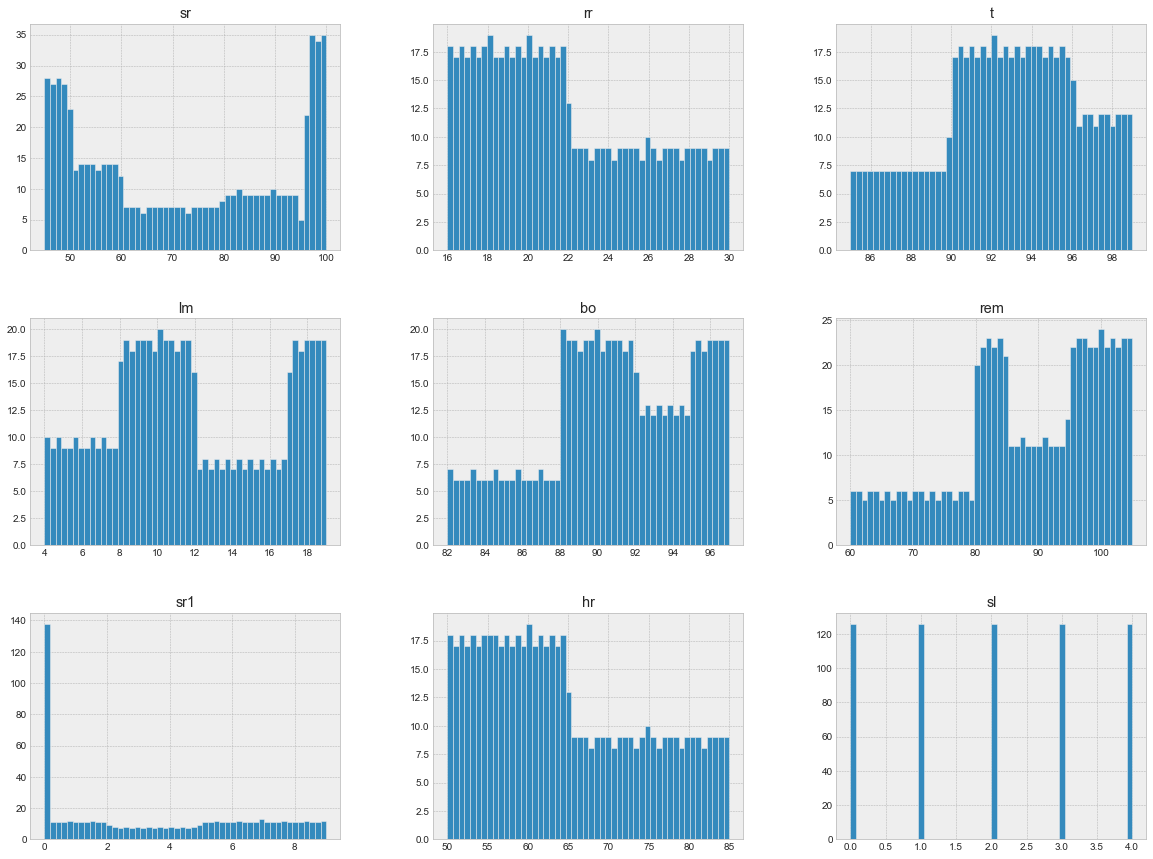

In [51]:
df.hist(bins=50, figsize=(20, 15))

plt.show()

Visualize the relationship between the continuous variables and the categorical target variable using boxplots or violin plots

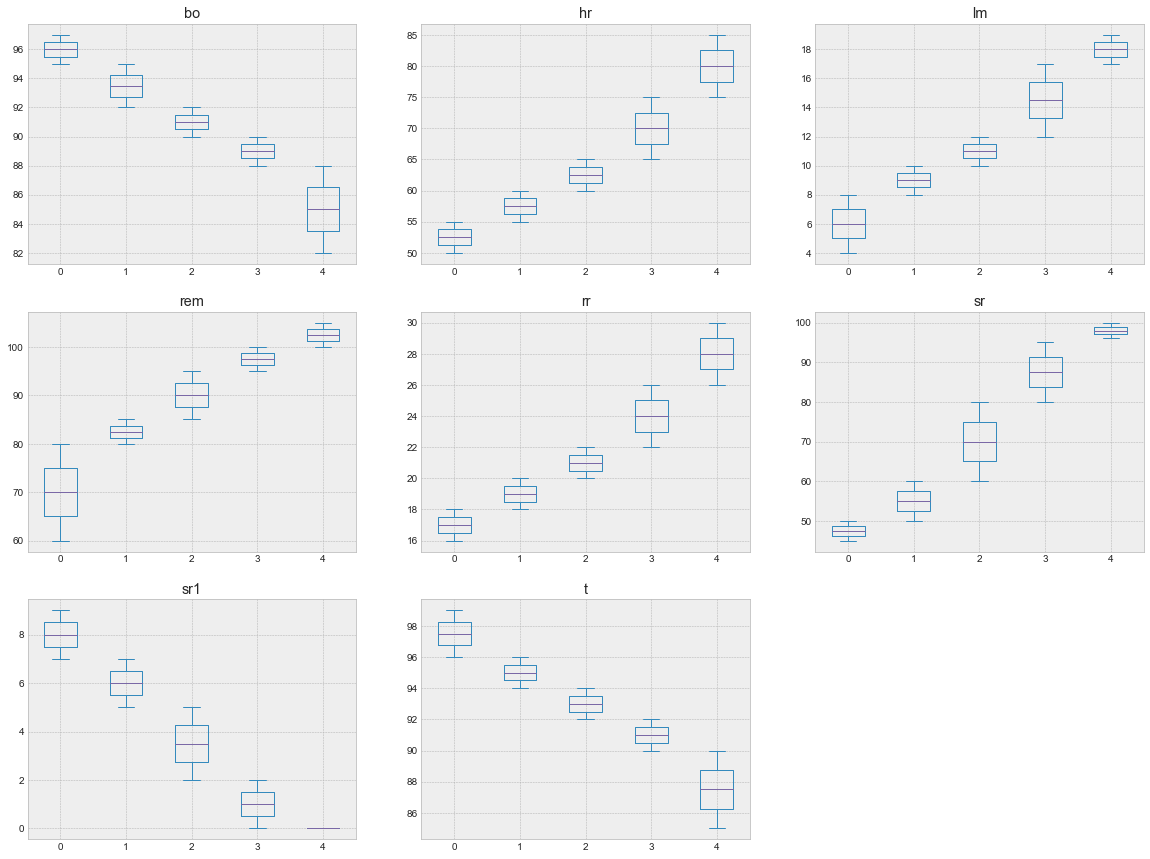

In [52]:
# create boxplots for each continuous variable by target variable
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(20, 15), by='sl')
plt.show()

Check for any correlations between the continuous variables using a correlation matrix heatmap.

In [53]:
#sheck correlations of variables to target variable
df.corr()['sl'][:-1]

sr     0.975322
rr     0.963516
t     -0.962354
lm     0.971071
bo    -0.961092
rem    0.951988
sr1   -0.973036
hr     0.963516
Name: sl, dtype: float64

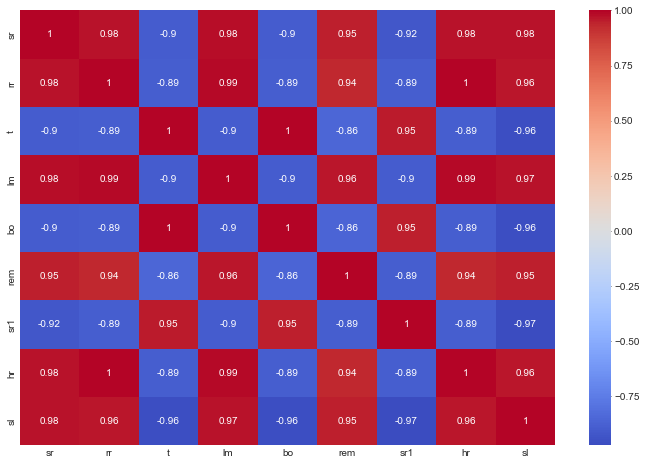

In [54]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

features are all highly correlated

## Model Building

training and testing

In [55]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

Accuracy of random forest: 0.9841269841269841
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



#### save the model

In [57]:
import joblib

filename = 'sleep_random_forest_model.joblib'
joblib.dump(rf, filename)

['sleep_random_forest_model.joblib']

#### load model

In [58]:
# load the saved model
loaded_model = joblib.load(filename)

# use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)